In [1]:
#using PyPlot
using Random
#using LaTeXStrings
#using LsqFit
#using HaltonSequences
#using Sobol
#using Primes
#using SpecialFunctions
using Statistics
#using PyCall
#using LinearAlgebra
#using Printf
using Plots

# Exercise 1. Monte Carlo simulation of the 2D Ising model

In [14]:

#second we want to implement the metropolis algorithm 
function single_flip!(grid, β, L)
    
    #we pick a random position
    i = rand(1:L)
    j = rand(1:L)
    
    #compute deltaE 
    S = grid[mod1(i-1,L),j]+grid[mod1(i+1,L),j]+grid[i,mod1(j-1,L)]+grid[i,mod1(j+1,L)]
    ΔE = 2*grid[i,j]*S
    
    if ΔE < 0 
        grid[i,j] *= -1
    elseif rand() < exp(-ΔE*β)
        grid[i,j] *= -1
    end
end
       


#creates a grid configuration threw thermalization by performing enough steps to reach at the steady state 
function metropolis!(β,L,n)
    
    grid = ones(Int,L,L)
        
    for i in 1:n
        single_flip!(grid,β,L)
    end
    return grid
end
    





metropolis! (generic function with 1 method)

In [18]:
function calc_H(grid,L)
    
    long_schlong = []
    for i in 1:L
        for j in 1:L
            S = grid[mod1(i-1,L),j]+grid[mod1(i+1,L),j]+grid[i,mod1(j-1,L)]+grid[i,mod1(j+1,L)]
            summand = -grid[i,j]*S
            append!(long_schlong,summand)
        end
    end
    return sum(long_schlong)
end


calc_H (generic function with 1 method)

## Task 1

In [21]:

function calculus!(β,L,n,Nₛ)

    Ms = [] # stores the magnetization per spin for each grid
    Es = [] # stores the energie per spin for each grid

    for i in 1:Nₛ
        S = metropolis!(β,L,n)
        E = calc_H(S,L)
        append!(Ms, sum(S)/L^2)
        append!(Es, E/L^2)
    end
    
    M_average = sum(Ms)/Nₛ
    E_average = sum(Es)/Nₛ
    
    return M_average, E_average
end
    
    


calculus! (generic function with 1 method)

In [25]:
#wir plotten als erstes E(per Spin) gegen verscheiden temperaturen


β = LinRange(0.0, 1.0, 40)  #temperature
L = 50 # gridsize
n = 5*L^2 #thermalization steps needed to reach roghly equlibrium
Nₛ = 1000 #number of samples

e = []
m = []
for t ∈ β
    mᵢ, eᵢ = calculus!.(t,L,n,Nₛ)
    append!(e,eᵢ)
    append!(m,mᵢ)
end



┌ Warning: Skipped marker arg o.
└ @ Plots /Users/Paul/.julia/packages/Plots/CBYO0/src/args.jl:1209


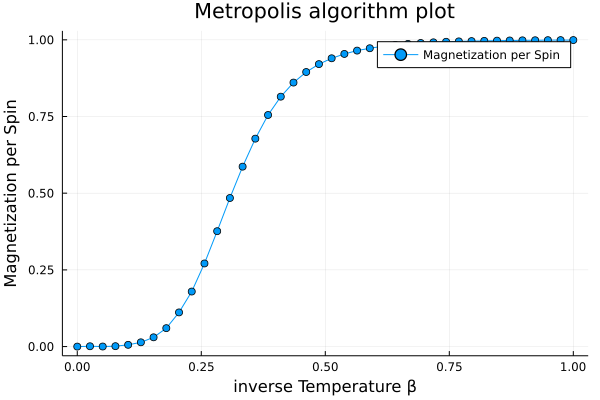

In [26]:
plot(β,m, marker = "o",label = "Magnetization per Spin")
plot!(title="Metropolis algorithm plot", xlabel = "inverse Temperature β", ylabel = "Magnetization per Spin")

┌ Warning: Skipped marker arg o.
└ @ Plots /Users/Paul/.julia/packages/Plots/CBYO0/src/args.jl:1209


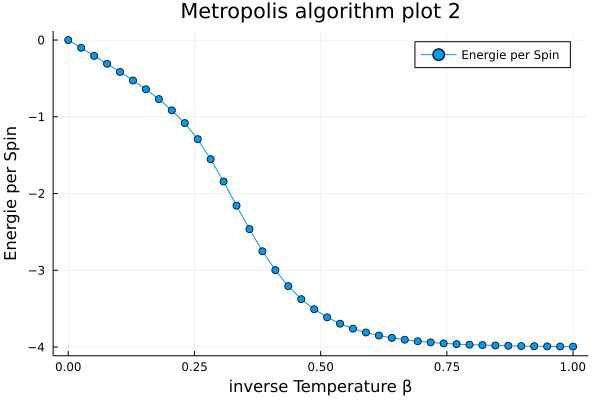

In [27]:
plot(β,e, marker = "o",label = "Energie per Spin")
plot!(title="Metropolis algorithm plot 2", xlabel = "inverse Temperature β", ylabel = "Energie per Spin")

## Task 2

an sich können wir um die grenztemperatur zu bestimmen einfach die schnittstelle mit 0.5(für den magnetisation plot) bestimmen. 
Um genauere ergebnisse zu erzielen müssen wir L grösser werden lassen, weil für L-> unendlich die funktion zu einer Stufenfunktion wird.